## Operation Class

#### Placeholder : An empty node that needs a value to be provided to compute output
#### Variables: Changeable parameter of Graph
#### Graph: Global Variable connecting variables and placeholders to operations. 

In [128]:
class Operation():
    def __init__(self, input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        for node in input_nodes:
            # add each operations' class
            node.output_nodes.append(self)
        # add each operations to Graph's operations
        _default_graph.operations.append(self)
    def compute(self):
        pass

In [129]:
class add(Operation):
    def __init__(self, x, y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var + y_var

In [130]:
class multiply(Operation):
    def __init__(self, x, y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var * y_var

In [131]:
class matmul(Operation):
    def __init__(self, x, y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var.dot(y_var)

In [132]:
class Placeholder():
    def __init__(self):
        self.output_nodes = []
        _default_graph.placeholders.append(self)

In [133]:
class Variable():
    def __init__(self, initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        _default_graph.variables.append(self)

In [134]:
class Graph():
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []
    def set_as_default(self):
        global _default_graph
        _default_graph = self

In [135]:
def traverse_postorder(operation):
    """
    Make sure computatons are done in the correct order (Ax first, then Ax + b). Feel free 
    to copy and paste this.
    """
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
    
    recurse(operation)
    return nodes_postorder
    

In [136]:
class Session():
    def run(self, operation, feed_dict={}):
        nodes_postorder = traverse_postorder(operation)
        #print(nodes_postorder)
        for node in nodes_postorder:
            if type(node) == Placeholder:
                node.output = feed_dict[node]
            elif type(node) == Variable:
                node.output = node.value
            else:
                # OPERATION
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs) # * for inputs without knowing how many inputs
            
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output

z = Ax + b

A = 10  # variable

b = 1 # variable

z = 10x + 1

x # placeholder (kiz)

In [137]:
g = Graph()
g.set_as_default()
A = Variable(15)
b = Variable(1)
x = Placeholder() # Expects to be provided later
y = multiply(A,x)
z = add(y, b)

In [138]:
sess = Session()
result = sess.run(operation=z, feed_dict={x:10})

In [139]:
result

151

In [140]:
import numpy as np
g = Graph()
g.set_as_default()
A = Variable([[10,20], [30,40]])
b = Variable([1,2,])
x = Placeholder()
y = matmul(A,x)
z = add(y,b)

sess = Session()
sess.run(operation=z, feed_dict={x:10})

# Classification
## Activation Function

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [147]:
sample_z = np.linspace(-10, 10, 100)
sample_a = sigmoid(sample_z)

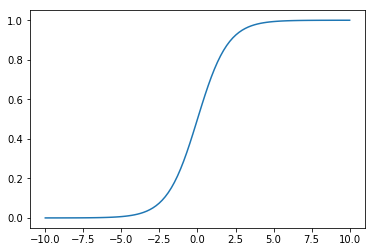

In [148]:
plt.plot(sample_z, sample_a)

In [150]:
class Sigmoid(Operation):
    def __init__(self, z):
        super().__init__([z])
    
    def compute(self, z_val):
         return 1 / (1+np.exp(-z_val))

In [152]:
from sklearn.datasets import make_blobs

In [154]:
data = make_blobs(n_samples=50, n_features=2, centers=2, random_state=75)

In [155]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [160]:
features = data[0]
labels = data[1]

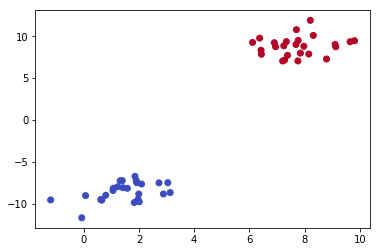

In [162]:
plt.scatter(features[:,0], features[:,1], c=labels, cmap='coolwarm')

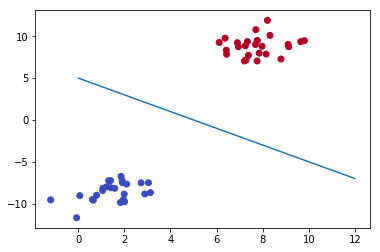

In [164]:
x = np.linspace(0, 12, 10)
y = -x+5
plt.scatter(features[:,0], features[:,1], c=labels, cmap='coolwarm')
plt.plot(x,y)

### equation should be something like this : 

## (1,1) * f - 5 = 0

In [165]:
np.array([1,1]).dot(np.array([[8],[10]])) - 5

array([13])

In [166]:
np.array([1,1]).dot(np.array([[2],[-10]])) - 5

array([-13])

In [168]:
g = Graph()
g.set_as_default()
x = Placeholder()
w = Variable([1,1])
b = Variable(-5)
z = add(matmul(w,x), b)
a = Sigmoid(z)
sess=Session()
sess.run(a, feed_dict={x:[8,10]})

0.999997739675702

In [169]:
sess.run(a, feed_dict={x:[2,-10]})

2.2603242979035746e-06